In [132]:
import pandas as pd
import time 
import json
import urllib.request
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
#matplotlib inline

In [13]:
with urllib.request.urlopen("https://alte-rs.ddnss.de/weather/processed/history.json") as url:
    data1 = json.loads(url.read().decode())

In [252]:
df = pd.DataFrame(data=data1)

In [253]:
df['time'] = pd.to_datetime(df['time'])

In [254]:
df['temp'] = pd.to_numeric(df['temp'])

In [255]:
df['pressure'] = pd.to_numeric(df['pressure'])

In [256]:
df['humidity'] = pd.to_numeric(df['humidity'])

In [257]:
df2 = df.set_index('time')

In [258]:
series = df2.rolling('10Min',min_periods=5).mean()

In [259]:
total =[df2,series]

In [260]:
testseries = series

In [261]:
init = testseries.index[0]

## Hier reduzieren wir die Datenmenge indem wir ein Datenpunkt pro 5 Min sampeln

In [262]:
for time in testseries.index:
    if time-init > timedelta(minutes = 5):
        init = time
    else:
        testseries = testseries.drop(time)
        
        
   
    

In [358]:
Y = testseries[40:]

Hier haben wir die Targetvariable selektiert

In [272]:
Y.head()

,humidity,pressure,temp
time,,,
2018-06-22 19:55:04.795,48.219115,1025.583542,26.473291
2018-06-22 20:00:19.935,48.285611,1025.611313,26.399506
2018-06-22 20:05:35.175,48.080302,1025.680405,26.422209
2018-06-22 20:10:50.555,47.475388,1025.720459,26.447182
2018-06-22 20:16:06.745,47.111524,1025.721176,26.433560


In [28]:
length = len(testseries)

In [16]:
print(length)

2195


Jetzt gehts los

In [265]:
testseries.loc[testseries.index[0]]

humidity      35.743404
pressure    1025.125806
temp          28.879808
Name: 2018-06-22 16:25:30.796000, dtype: float64

In [376]:
x = np.zeros((length-40, 60))

In [267]:

testseries.loc[testseries.index[0]]

humidity      35.743404
pressure    1025.125806
temp          28.879808
Name: 2018-06-22 16:25:30.796000, dtype: float64

In [377]:
for row in range(0,length-40):
    for width in range(0,20):
        for i in range(0,3):
            x[row,3*width+i]= testseries.loc[testseries.index[row + width]][i]

In [33]:
#y = Y.values

In [19]:
print(x[0])

[   35.74340363  1025.12580566    28.87980804    36.05182481  1025.12454224
    28.80261767    37.18123507  1025.16242981    28.50634348    38.23916078
  1025.22750855    28.17601526    38.70193815  1025.25201416    28.10563624
    38.80667138  1025.24931335    28.12606895    39.74220109  1025.2592926
    28.00801361    41.21469355  1025.24116516    27.95125592    41.23526621
  1025.24137878    28.0386622     40.85664916  1025.30384827    28.14196074
    41.30654287  1025.39454651    28.10450077    42.24124122  1025.43695068
    27.94558001    42.72355247  1025.41156006    27.84909236    42.88023663
  1025.38156128    27.74465859    42.69051218  1025.36283874    27.71741498
    42.69549942  1025.33816528    27.80709195    43.09655976  1025.32145691
    27.85590339    43.4963727   1025.32043457    27.89449847    43.42530394
  1025.33094788    27.90017414    43.56349325  1025.36236572    27.83774066]


In [380]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(x)
x = imputer.transform(x)
imputer = imputer.fit(Y)
Y = pd.DataFrame(dict(zip(Y.axes[1].values.tolist(), imputer.transform(Y).T)), index=Y.index)

In [379]:
x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [381]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 1/3, random_state = 0)


y_train = Y[0:4639]
X_train = x[0:4639]
y_test = Y[4640:]
X_test = x[4640:]

In [382]:
X_train

array([[  35.74340363, 1025.12580566,   28.87980804, ...,   43.56349325,
        1025.36236572,   27.83774066],
       [  36.05182481, 1025.12454224,   28.80261767, ...,   44.60126185,
        1025.37701416,   27.75600994],
       [  37.18123507, 1025.16242981,   28.50634348, ...,   45.12243223,
        1025.38113403,   27.70379305],
       ...,
       [  37.69284678, 1024.23907471,   31.16145873, ...,   41.33397341,
        1024.42199707,   29.79246831],
       [  37.63881826, 1024.26690674,   31.00934887, ...,   40.72552538,
        1024.46591187,   29.96501112],
       [  37.68453503, 1024.28274536,   30.91626644, ...,   39.89805317,
        1024.49581909,   30.14209414]])

In [383]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [384]:
X_train = sc_X.fit_transform(X_train)

In [385]:
X_test = sc_X.transform(X_test)
y_test_c = y_test
y_train_c=y_train
y_test = pd.DataFrame(dict(zip(y_test.axes[1].values.tolist(), sc_X.fit_transform(y_test).T)), index=y_test_c.index)
y_train = pd.DataFrame(dict(zip(y_train.axes[1].values.tolist(), sc_X.fit_transform(y_train).T)), index=y_train_c.index)


In [375]:
X_train

array([[-0.34108681,  0.24925618, -0.85706708],
       [-0.30550504,  0.24889196, -0.87757051],
       [-0.17520786,  0.2598143 , -0.95626736],
       ...,
       [-0.11618453, -0.00637324, -0.25101116],
       [-0.12241766,  0.00165026, -0.29141484],
       [-0.11714343,  0.00621627, -0.31613955]])

In [392]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = False)
regressor.fit(X_train, y_train['temp'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [397]:
regressor.coef_

array([-2.09357031e-01, -2.95730290e-01, -4.40678364e-01,  1.53186425e-01,
        5.93109701e-02, -1.23797412e-02, -1.44549951e-01, -1.72969902e-01,
       -1.68651613e-01,  7.89952712e-02,  3.46559701e-02,  7.38404253e-02,
       -3.06160911e-02, -8.88124707e-02,  2.54357425e-03,  4.78854510e-02,
        3.05427631e-01,  6.61489864e-02,  9.74568752e-02, -8.30491281e-02,
       -1.59862751e-02,  3.49562017e-02,  1.59940416e-01, -2.61766470e-02,
        1.43446896e-02, -1.94956335e-01, -7.61573029e-02, -4.46810805e-02,
        3.74668807e-01, -6.55289748e-02,  8.06575883e-02, -6.34730968e-01,
       -7.33191517e-02, -1.30536054e-01,  7.37959600e-01, -2.01334987e-02,
        1.16251240e-01, -1.14395257e+00, -1.11660840e-01, -1.94627207e-05,
        1.38049942e+00,  8.27601897e-02,  1.08881468e-01, -1.74901057e+00,
       -2.53284634e-01,  2.50515747e-02,  2.53106554e+00,  1.49304978e-01,
        1.97813179e-02, -3.13664242e+00, -5.01540350e-01,  3.96305021e-02,
        4.48207868e+00,  

In [393]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_train_p = regressor.predict(X_train)

In [290]:
#data = np.array([y_pred[:,0], y_pred[:,1], y_pred[:,2], y_test['temp'].values, y_test['pressure'].values, y_test['humidity'].values]).T
#data_ins = np.array([y_train_p[:,0], y_train_p[:,1], y_train_p[:,2], y_train['temp'].values, y_train['pressure'].values, y_train['humidity'].values])

In [394]:
data = np.array([y_pred, y_test['temp'].values])
data_ins = np.array([y_train_p, y_train['temp'].values])

In [291]:
#keys=['temp_tr', 'pressure_tr', 'hum_tr','temp_pr', 'pressure_pr', 'hum_pr']


#resultset = pd.DataFrame(dict(zip(keys,data.T)), index = y_test.index)
#resultset_train = pd.DataFrame(dict(zip(keys,data_ins)), index = y_train.index)

In [395]:
keys=['temp_tr', 'temp_pr']


resultset = pd.DataFrame(dict(zip(keys,data)), index = y_test.index)
resultset_train = pd.DataFrame(dict(zip(keys,data_ins)), index = y_train.index)

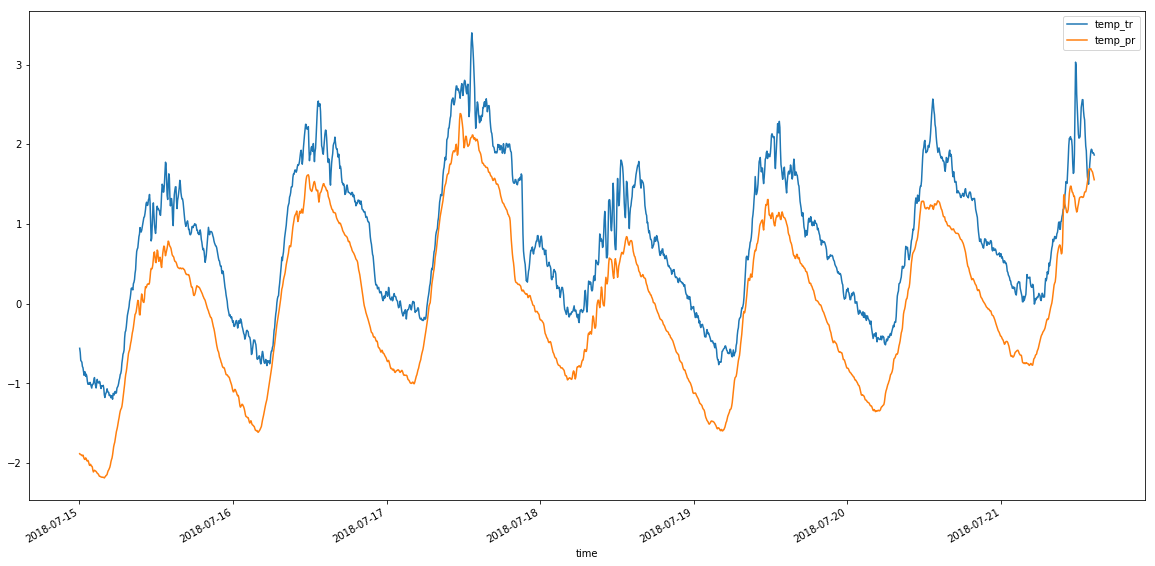

In [396]:
resultset.plot.line(y = ['temp_tr', 'temp_pr'], figsize=(20,10))

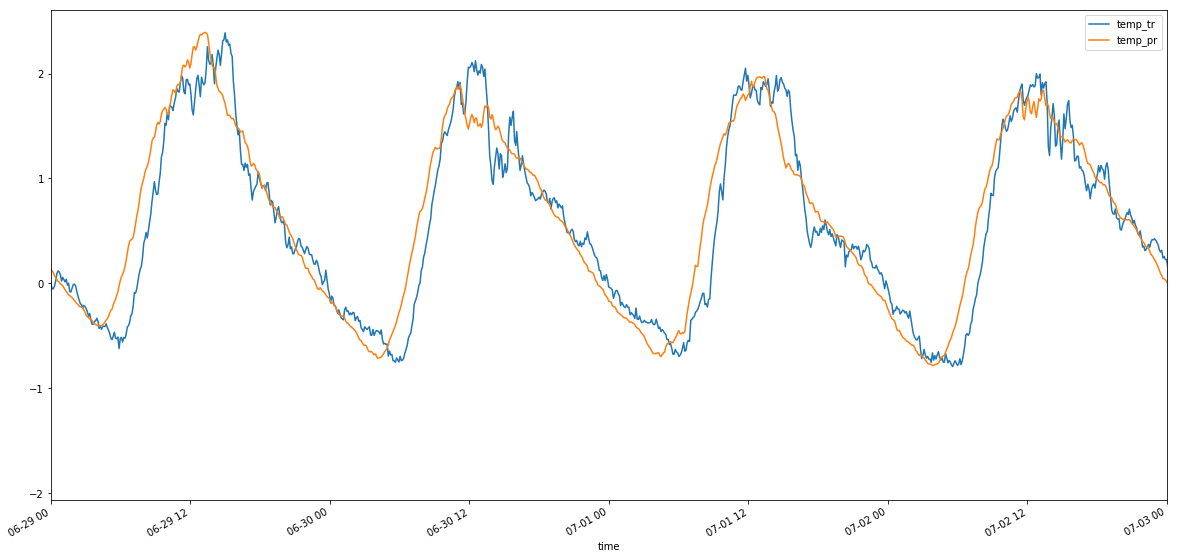

In [405]:
resultset_train.plot.line(y = ['temp_tr', 'temp_pr'], figsize=(20,10), xlim=['20180629','20180703'])

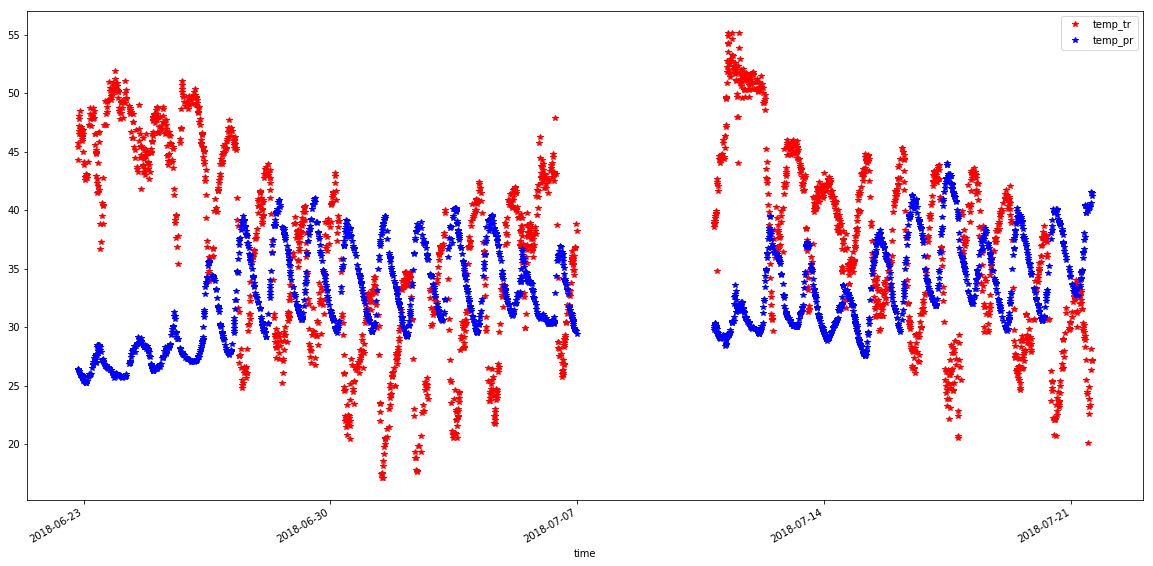

In [169]:
resultset.plot(y = ['temp_tr','temp_pr'], figsize=(20,10),style = ['r*','b*'])

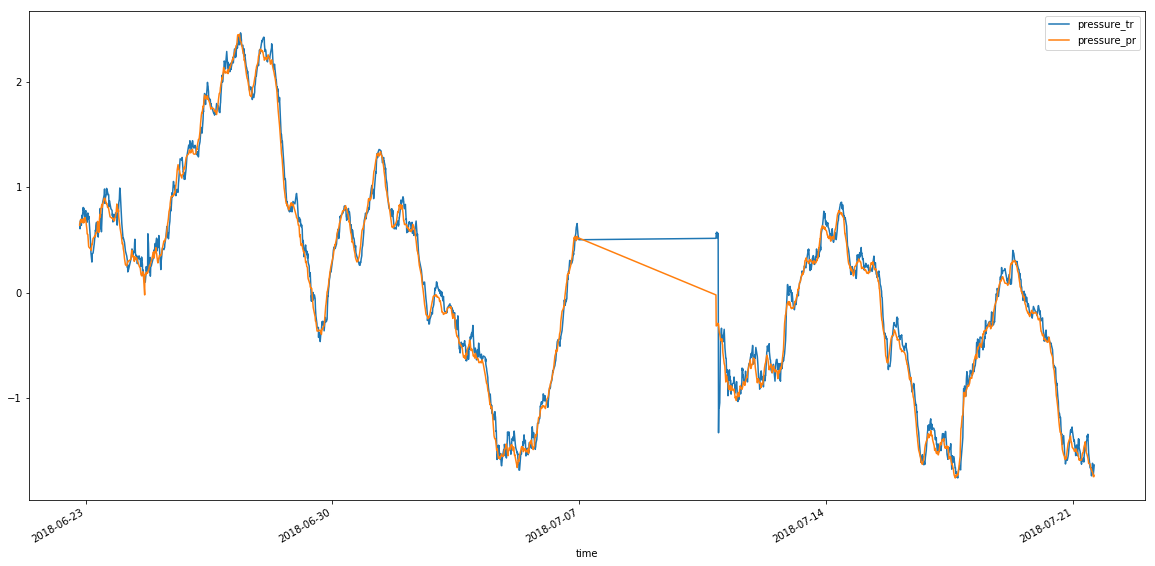

In [293]:
resultset.plot.line(y = ['pressure_tr', 'pressure_pr'], figsize=(20,10))

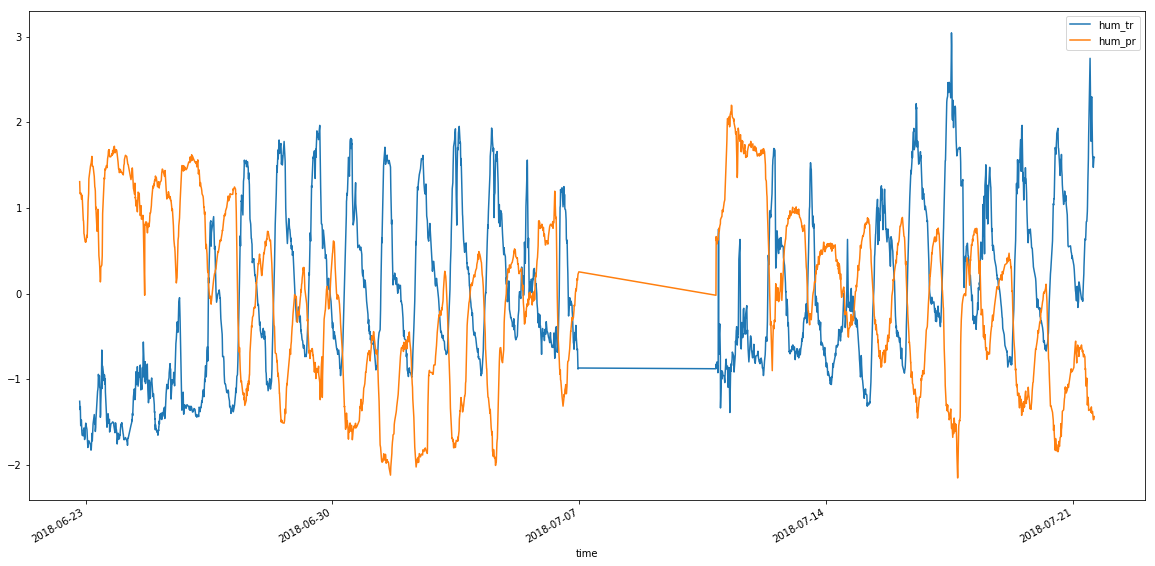

In [299]:
resultset.plot.line(y = ['hum_tr', 'hum_pr'], figsize=(20,10))

In [315]:
y_test.index.values

array(['2018-06-27T10:04:52.076000000', '2018-07-05T16:39:12.676000000',
       '2018-07-01T02:26:29.765000000', ...,
       '2018-06-29T06:04:13.126000000', '2018-07-05T02:29:23.916000000',
       '2018-07-02T22:50:14.256000000'], dtype='datetime64[ns]')

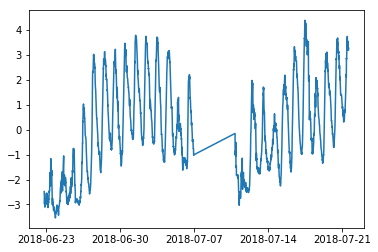

In [325]:
plt.plot((y_test['temp']-y_pred[:,0]).sort_index())

In [329]:
(abs(y_test['temp']-y_pred[:,0])).sum()/len(y_test['temp']-y_pred[:,0])

1.5874057263844041

time
2018-06-27 10:04:52.076    2.335873
2018-07-05 16:39:12.676    0.220197
2018-07-01 02:26:29.765   -0.082692
2018-07-11 06:29:44.925   -3.000336
2018-07-17 22:57:20.945    0.448369
2018-07-11 14:48:45.755   -2.059741
2018-06-28 19:04:02.966    1.575330
2018-07-18 08:36:30.265   -0.191189
2018-07-05 23:01:27.865   -1.135790
2018-07-13 22:20:31.505   -1.303852
2018-07-04 09:52:11.606    2.026662
2018-06-26 08:17:16.935   -2.233875
2018-07-03 01:17:44.476   -0.130431
2018-07-18 03:02:26.435   -0.460130
2018-07-02 07:19:41.606    0.896876
2018-06-30 12:31:34.436    3.001615
2018-07-01 19:37:25.386    1.642622
2018-07-19 05:59:56.525   -0.984361
2018-07-15 08:32:09.605    0.368642
2018-07-17 06:07:09.975   -0.508931
2018-07-03 22:03:42.486   -0.199547
2018-07-11 17:10:09.005   -2.003954
2018-07-16 18:41:42.545    1.918917
2018-07-01 19:25:07.296    1.504517
2018-07-01 05:30:38.605   -0.394823
2018-06-30 06:57:40.165    0.160688
2018-06-30 04:49:33.066   -0.916670
2018-07-19 15:01:11.885

In [400]:
from sklearn.metrics import mean_squared_error

In [401]:
mean_squared_error(y_test['temp'], y_pred)

0.6468089716907097

In [402]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring= 'neg_mean_squared_error', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

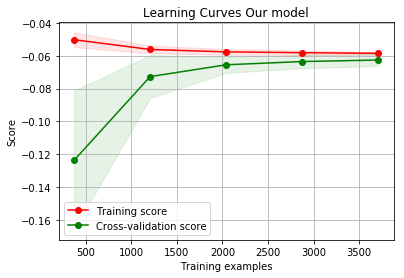

In [403]:
title = "Learning Curves Our model"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(regressor, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [ ]:
plt.

Fazit: Das System lernt doch!

In [63]:
y_test[0]

array([   29.26208814,  1026.25531684,    37.28193325])

In [64]:
y_pred[0]

array([   28.48644612,  1026.17653247,    36.0360115 ])

In [65]:
y_test[126]

array([   41.74468528,  1031.31079102,    29.81920751])

In [78]:
y_pred[126]

array([   42.19149352,  1031.37648107,    30.18654374])

In [86]:
len(y_train[:,0])

1436

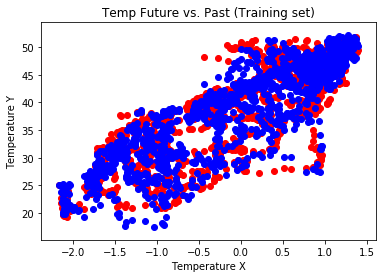

In [102]:
plt.scatter(X_train[:,0], y_train[:,0], color = 'red')
plt.scatter(X_train[:,0], regressor.predict(X_train)[:,0], color = 'blue')
plt.title('Temp Future vs. Past (Training set)')
plt.xlabel('Temperature X')
plt.ylabel('Temperature Y')
plt.show()



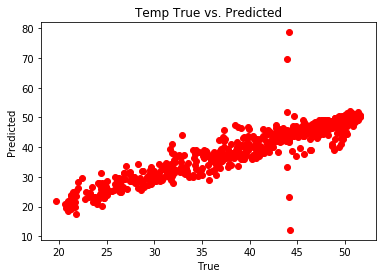

In [59]:
# Visualising the Test set results
plt.scatter( y_test[:,0],y_pred[:,0], color = 'red')
plt.title('Temp True vs. Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

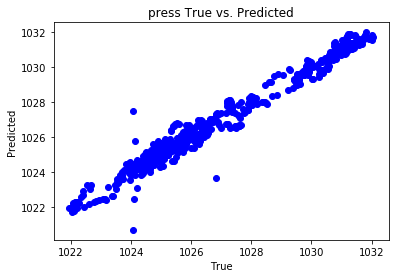

In [60]:
plt.scatter( y_test[:,1],y_pred[:,1], color = 'blue')
plt.title('press True vs. Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

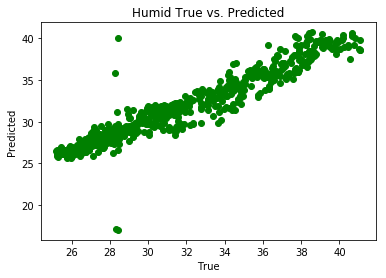

In [61]:
plt.scatter( y_test[:,2],y_pred[:,2], color = 'green')
plt.title('Humid True vs. Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [56]:
len(y_pred)

723